In [2]:
import seaborn as sns 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import cufflinks as cf
import plotly.express as px
import tensorflow as tf
import os

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from sklearn import preprocessing 
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans

cf.go_offline()
%matplotlib inline

In [3]:
# read the dataset 
df = pd.read_csv('/Users/aneruthmohanasundaram/Documents/GitHub/Iris-Flower-Analysis/iris.csv')

# To check the head of the dataset upto first 10 elements 
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


# Visualising the dataset

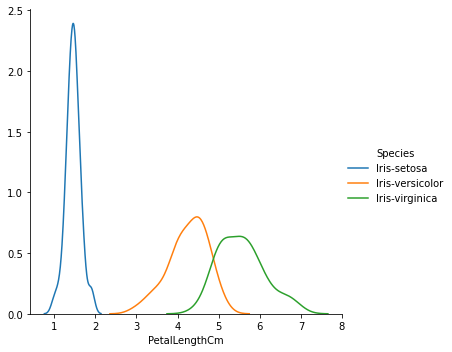

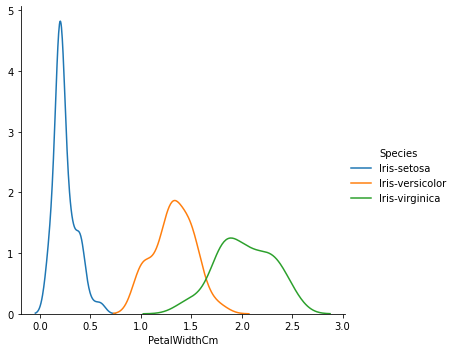

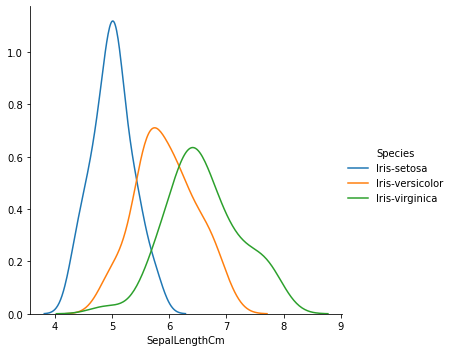

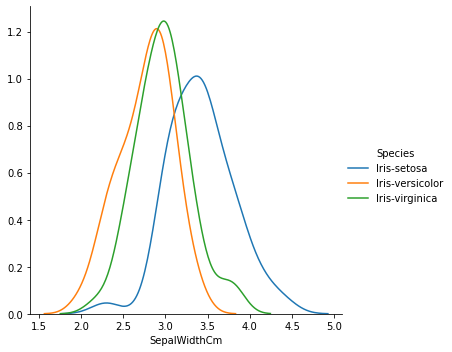

In [4]:
sns.FacetGrid(df,hue="Species",size=5).map(sns.kdeplot,"PetalLengthCm").add_legend()
sns.FacetGrid(df,hue="Species",size=5).map(sns.kdeplot,"PetalWidthCm").add_legend()
sns.FacetGrid(df,hue="Species",size=5).map(sns.kdeplot,"SepalLengthCm").add_legend()
sns.FacetGrid(df,hue="Species",size=5).map(sns.kdeplot,"SepalWidthCm").add_legend()
plt.show()

In [5]:
df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].iplot(kind='box')

In [6]:
px.violin(df,y="PetalLengthCm",color='Species',points='all')

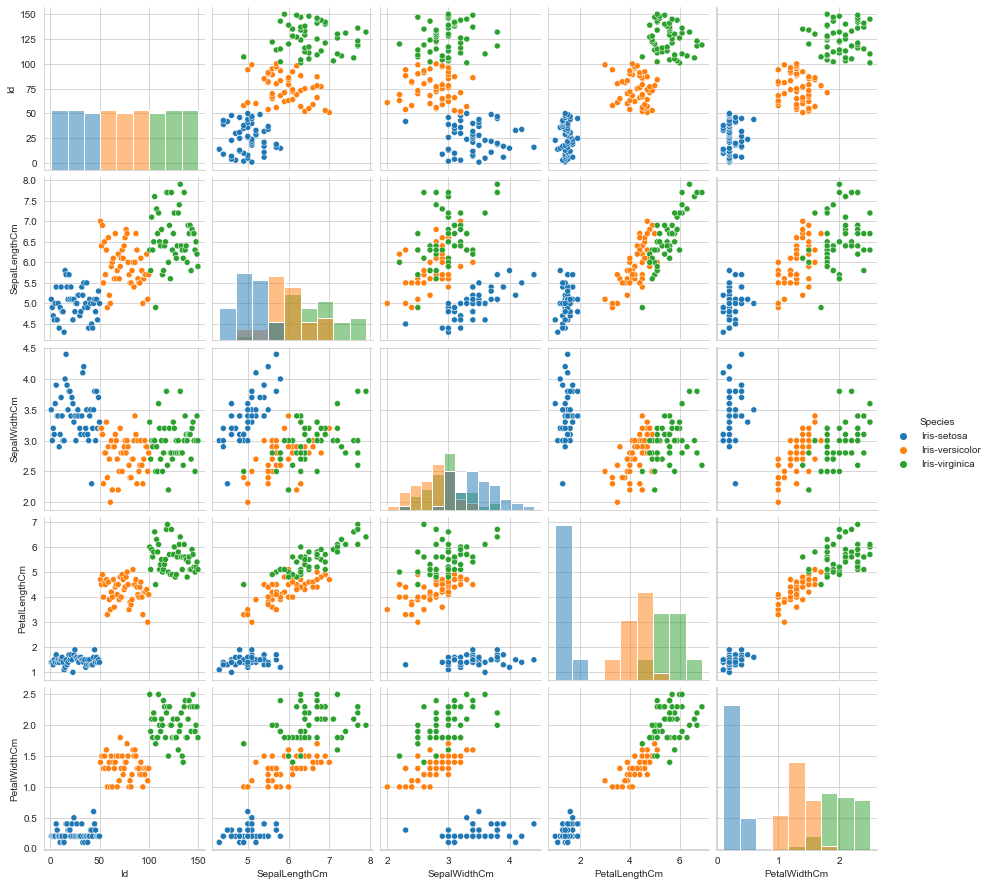

In [7]:
# basic mandatory plotting pair plot 
sns.set_style("whitegrid")
sns.pairplot(df,hue='Species',diag_kind='hist')

# Splitting the data using train test split for our upcomming models
## Basically we split the dataest into two varaible such that in one variable it contains the feature class and in another variable it contains the target variable.

## Since we have three categorical column in species column we have to label encode it ##

In [8]:
train_df, test_df = train_test_split(df.iloc[:, 1:])

In [9]:
# X Train
X_train_df = train_df.iloc[:, :4]
X_train = np.array(X_train_df)
m = X_train.shape[0]

# X Test
X_test_df = test_df.iloc[:, :4]
X_test = np.array(X_test_df)
a = X_test.shape[0]

#  y Train
y_train_dummies = pd.get_dummies(train_df["Species"])
Y_train = np.array(y_train_dummies)

# y Test
y_test_dummies = pd.get_dummies(test_df["Species"])
Y_test = np.array(y_test_dummies)

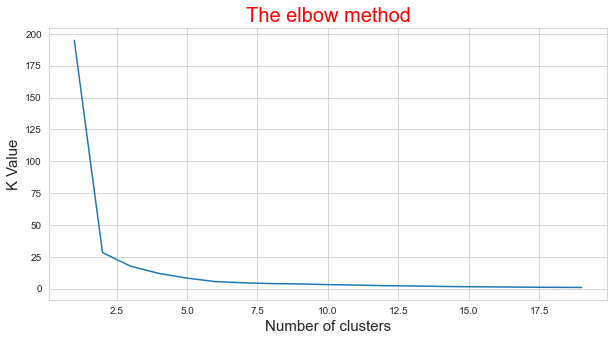

In [10]:
k_value = []
for i in range(1,20):
    km = KMeans(n_clusters = i, init = 'k-means++')
    km.fit(X_test)
    k_value.append(km.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 20), k_value)
plt.title('The elbow method',fontsize=20,color='red')
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('K Value',fontsize=15)
plt.show()

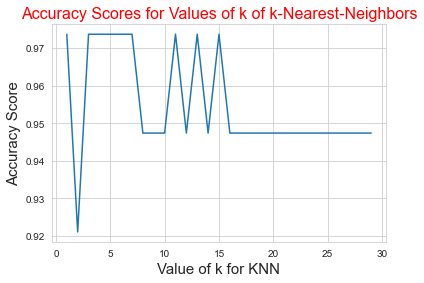

In [13]:
# Predicting the Kmeans 
km = KMeans(n_clusters = 2, init = 'k-means++')
km_predict = km.fit_predict(X_test)
my_path = '/Users/aneruthmohanasundaram/Documents/GitHub/Iris-Flower-Analysis/Output'
my_file = 'Kmeans.png'
os.path.join(my_path,my_file)

k_range = list(range(1,30))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN',fontsize=15)
plt.ylabel('Accuracy Score',fontsize=15)
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors',fontsize=16,color='red')
plt.savefig(os.path.join(my_path,my_file))

## Random Forest Algorithm and Decision Tree for Iris Dataset

In [28]:
rf = RandomForestClassifier(n_estimators=100)

# To fit the Random Forest Model 
rf.fit(X_train, Y_train)

# To print the predcitions of the Random Forest Model 
rf_predict = rf.predict(X_test)

rf_value = (np.mean(np.isclose(Y_test, rf_predict)) * 100).round(2)
print('Accuracy rate for Decision Tree is',rf_value,'%')

Accuracy rate for Decision Tree is 94.74 %


In [29]:
dt = DecisionTreeClassifier()
    
# To fit the Random Forest Model 
dt.fit(X_train, Y_train)

# To print the predcitions of the Random Forest Model 
dt_predict = dt.predict(X_test)

dt_value = (np.mean(np.isclose(Y_test, dt_predict)) * 100).round(2)
print('Accuracy rate for Decision Tree is',dt_value,'%')

Accuracy rate for Decision Tree is 94.74 %


In [30]:
# To print the confusion matrix
print('The confusion matrix is: ' + '\n \n',confusion_matrix(Y_test, dt_predict))

print('\n')

# To print the classification report 
print('The classification report is: ' + '\n \n',classification_report(Y_test, dt_predict))

ValueError: multilabel-indicator is not supported